# Network Analysis Lab

Complete the following exercises to help solidify your understanding of network analysis.

In [1]:
import networkx as nx
import nxviz
import pandas as pd
import community

In [2]:
#from code along
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

## U.S. Mens Basketball Data Set

In the `us_mens_basketball.csv` data set, each row represents an single basketball player's participation in a single event at a single Olympics. 

In [3]:
basketball = pd.read_csv('./data/us_mens_basketball.csv')

In [4]:
basketball.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold
2,2863,Walter Ray Allen,M,25.0,192.0,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
3,3874,"William Lloyd ""Willie"" Anderson, Jr.",M,21.0,200.0,86.0,United States,USA,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Bronze
4,4505,Carmelo Kyan Anthony,M,20.0,203.0,109.0,United States,USA,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


## 1. Transform this data set into one that can be turned into a graph where the entities are represented by the Name field and the relationships are represented by whether the players played in the same Olympics together (Games field).

Sort descending by the number of pairwise interactions. Which pair of players have competed in the most Olympics together?

In [5]:
####INVESTGAR
def df_to_dfgraph(df, nodes, edges):
    
    """
    Crea un dataframe con las relaciones entre los nodos.
    Input : 
    *df: dataframe origen
    *nodes : columna del df que quiere usarse de nodos
    *edges : columna del df que quiere usarse de enlace
    
    Output:
    *df: con las relaciones
    
    """
    import itertools 
    #Con esto obtenemos la lista de tuplas
    lst = [(df[edges][i],df[nodes][i]) for i in range(0, len(df[nodes]))]
    #Pasamos a diccionario
    d = {}
    for k, v in lst:
        d.setdefault(k, []).append(v)
    #Creamos las permutaciones de los valores del dict
    lst2 = [list(itertools.combinations(i, 2)) for i in d.values()]
    #Por último sacamos las tuplas de las listas para obtener solo una lista de tuplas y no una lista
    #de listas de tuplas.
    total_relationships=[]
    for i in lst2:
        for e in i:
            total_relationships.append(e)
    
    df = pd.DataFrame(total_relationships, columns = ["Name_x", "Name_y"])
        
    return df

In [6]:
df = df_to_dfgraph(basketball, 'Name', 'Games')

## 2. Use the `from_pandas_edgelist` method to turn the data frame into a graph.

In [7]:
G = nx.from_pandas_edgelist(df,'Name_x', 'Name_y')

## 3. Compute and print the following graph statistics for the graph:

- Number of nodes
- Number of edges
- Average degree
- Density

In [22]:
print(f'GRAPH STATISTICS\nNumber of nodes: {G.number_of_nodes()}\nNumber of edges: {G.number_of_edges()}\nAverage degree: {2*G.number_of_edges() / float(G.number_of_nodes()):.2f}\nDensity: {nx.density(G):.2f}'
)

GRAPH STATISTICS
Number of nodes: 196
Number of edges: 1232
Average degree: 12.57
Density: 0.06


In [25]:
pos = nx.spring_layout(G)
def draw(G, pos, measures, measure_name, logscale=False, labels=False):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=100, cmap=plt.cm.Blues, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_edgecolor('k')
    
    if logscale:
        nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    
    if labels:
        labels = nx.draw_networkx_labels(G, pos)
        
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

## 4. Compute betweenness centrality for the graph and print the top 5 nodes with the highest centrality.

In [30]:
import operator
def centrality_graph(tipo, num, title):
    '''
    Input:
        -Tipo: type of centrality analysis we are going to do:
            
            Degree Centrality: nx.degree_centrality(G), 'Degree Centrality'
            Eigenvector Centrality: nx.eigenvector_centrality(G), 'Eigenvector Centrality'
            Katz Centrality: 
            PageRank: draw(DiG, dpos, nx.pagerank(DiG, alpha=0.85), 'DiGraph PageRank')
            HITS Hubs: h,a = nx.hits(DiG)
                        draw(DiG, dpos, h, 'DiGraph HITS Hubs')
            Authorities: draw(DiG, dpos, a, 'DiGraph HITS Authorities')
            Closeness Centrality: nx.closeness_centrality(G), 'Closeness Centrality'
            Betweenness Centrality: nx.betweenness_centrality(G), 'Betweenness Centrality'
            
        -Num: number of outcome we want printed
        -Title: title of the graphs
    
    
    Output:
        - Returns the specified cetrality graph 
        - Prints the top 5 nodes with highest centrality
    '''
    x = {k: v for k, v in sorted(tipo.items(), key=lambda item: item[1])}
    cd = sorted(x.items(),key=operator.itemgetter(1),reverse=True)
    return (pd.DataFrame(cd, columns = ['Name', 'Centrality'])[:num], draw(G, pos, tipo, title))

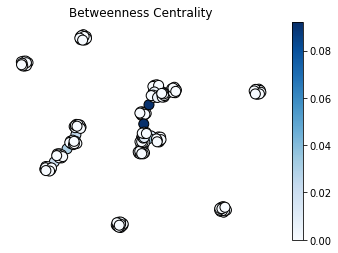

(                             Name  Centrality
 0              Gary Dwayne Payton    0.091938
 1            Jason Frederick Kidd    0.091356
 2            Carmelo Kyan Anthony    0.047423
 3          David Maurice Robinson    0.032662
 4  William Marion "Bill" Hougland    0.030241, None)

In [32]:
centrality_graph(nx.betweenness_centrality(G), 5, 'Betweenness Centrality')

## 5. Compute Eigenvector centrality for the graph and print the top 5 nodes with the highest centrality.

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


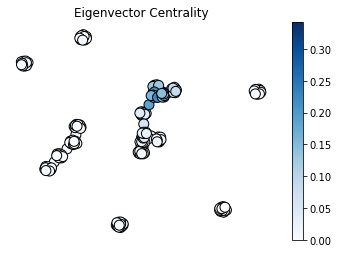

(                                Name  Centrality
 0               Carmelo Kyan Anthony    0.341850
 1               LeBron Raymone James    0.288454
 2             Deron Michael Williams    0.224317
 3  Christopher Emmanuel "Chris" Paul    0.224317
 4                   Kobe Bean Bryant    0.224317, None)

In [33]:
centrality_graph(nx.eigenvector_centrality_numpy(G), 5, 'Eigenvector Centrality')

## 6. Compute degree centrality for the graph and print the top 5 nodes with the highest centrality.

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


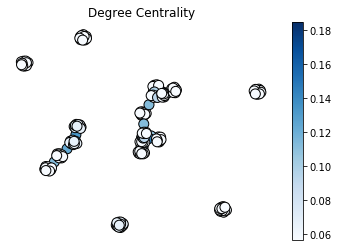

(                             Name  Centrality
 0            Carmelo Kyan Anthony    0.184615
 1          David Maurice Robinson    0.143590
 2            LeBron Raymone James    0.133333
 3     Robert Albert "Bob" Kurland    0.133333
 4  William Marion "Bill" Hougland    0.123077, None)

In [34]:
centrality_graph(nx.degree_centrality(G), 5, 'Degree Centrality')

## 7. Generate a network visualization for the entire graph using a Kamada-Kawai force-directed layout.

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


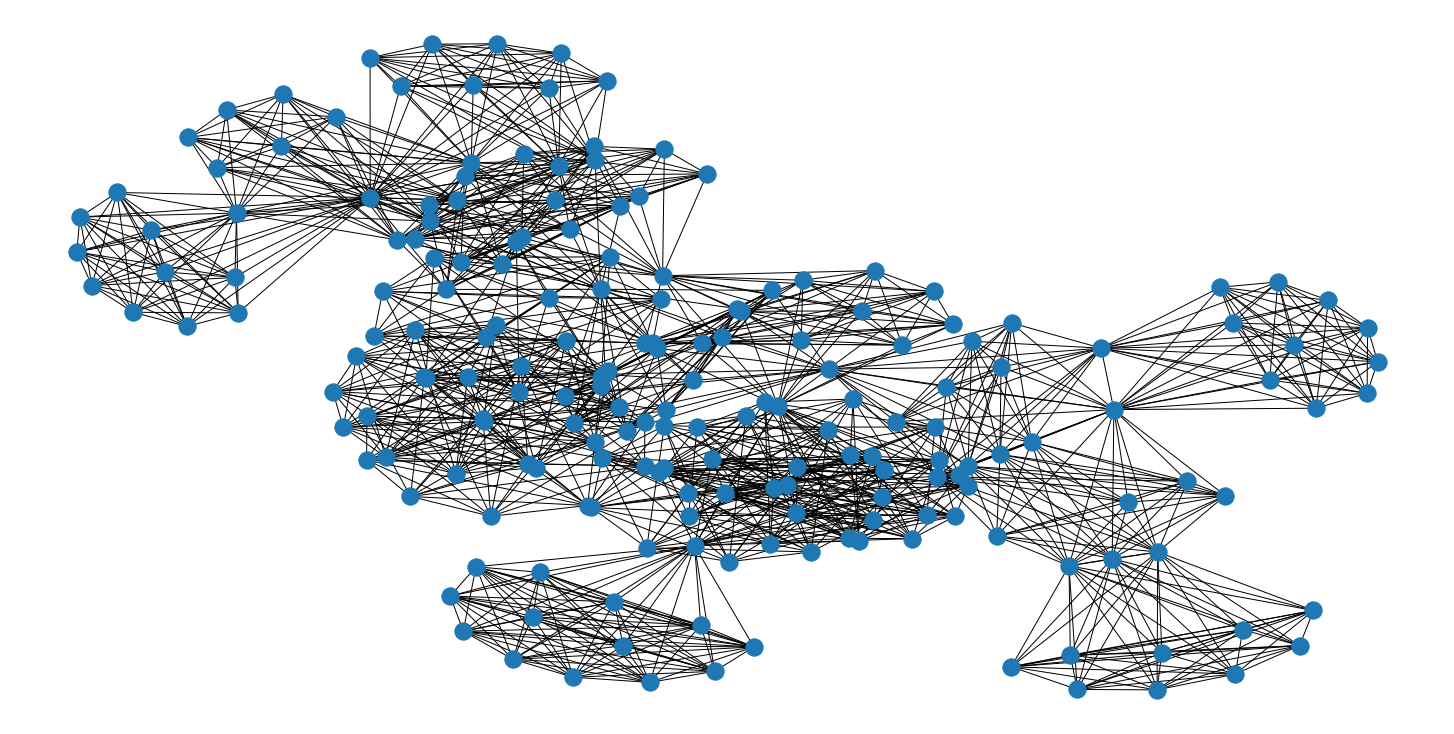

In [35]:
plt.figure(figsize=(20,10))
nx.draw_kamada_kawai(G)

## 8. Create and visualize an ego graph for the player with the highest betweenness centrality.

In [53]:
G

In [50]:
def sorted_betweenness(G, num):
    
    """
    Devuelve el número de nodos más centrales
    """
    
    ebet = nx.betweenness_centrality(G)
    sorted_ebet = sorted(ebet.items(), key=operator.itemgetter(1), reverse=True)
    return (pd.DataFrame(sorted_ebet[0:num],columns=["Player Name", "Betweenness Centrality"]))

In [51]:
ego = nx.ego_graph(G,sorted_betweenness(G, 1), radius=1)


NodeNotFound: Source           Player Name  Betweenness Centrality
0  Gary Dwayne Payton                0.091938 is not in G

In [45]:

plt.figure(figsize=(14,8))
nx.draw_kamada_kawai(ego, node_size=500, node_color='green', alpha=0.8, width=0.5, with_labels=True, font_size=15)

TypeError: 'float' object is not iterable

<Figure size 1008x576 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,10))

nx.draw_kamada_kawai(ego, node_size=500, node_color='green', alpha=0.8, width=0.5, with_labels=True, font_size=15)

## 9. Identify the communities within the entire graph and produce another visualization of it with the nodes color-coded by the community they belong to.

In [39]:
from community import community_louvain
partition = community.community_louvain.best_partition(G)
values = list(partition.values())

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


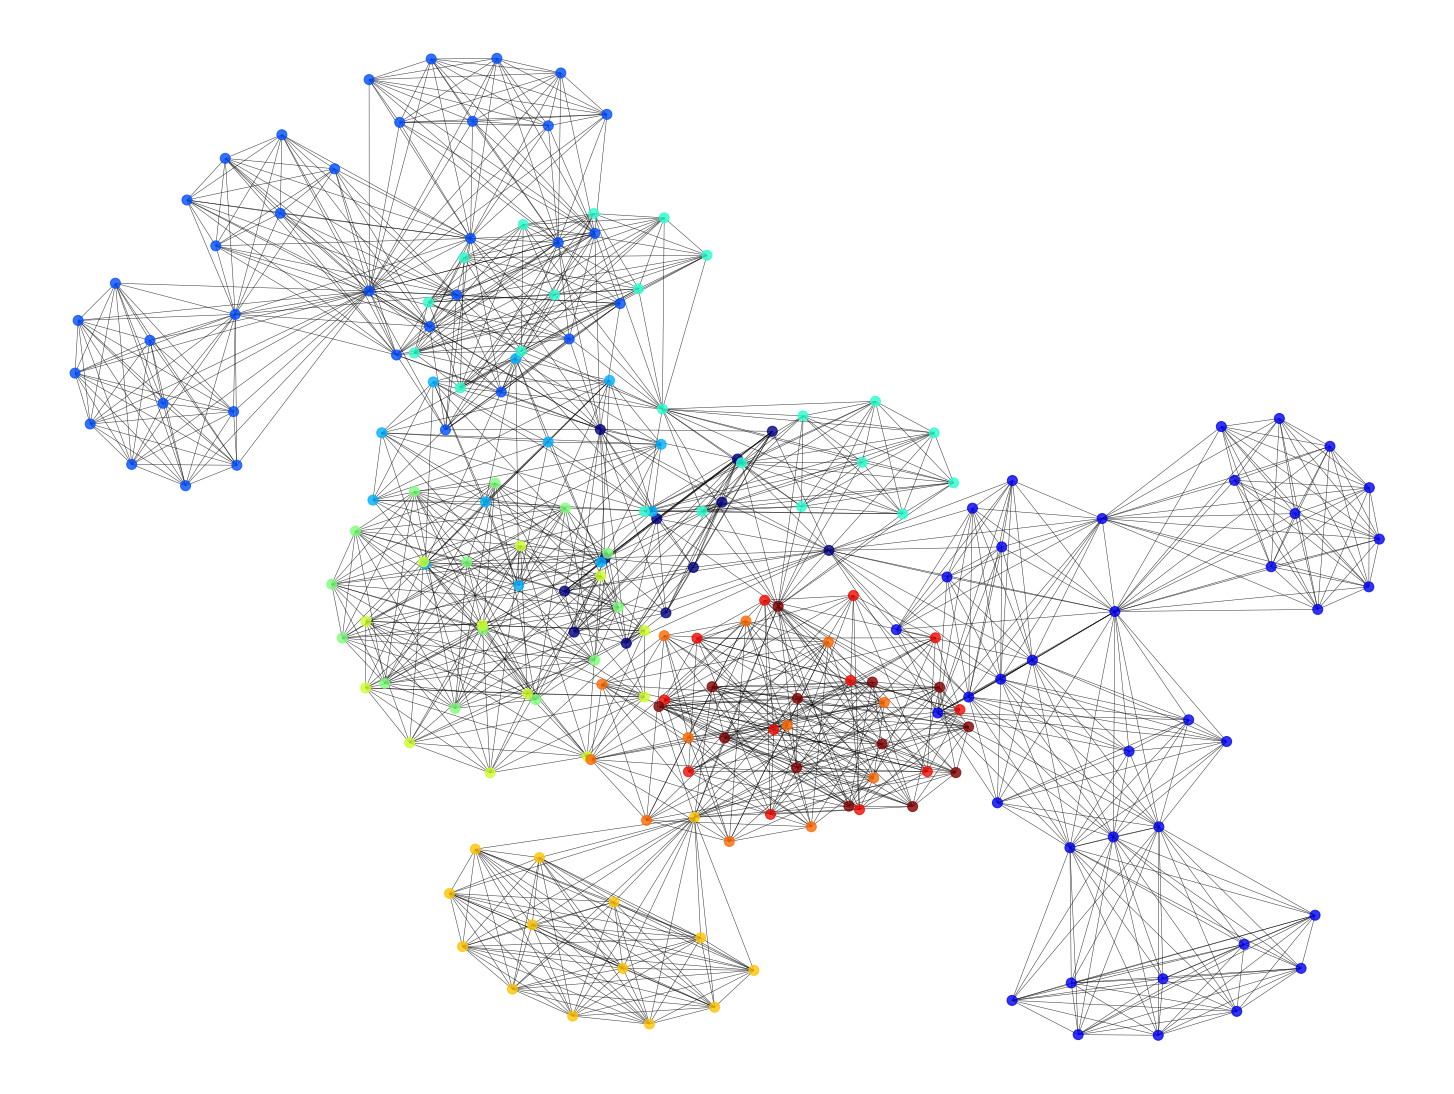

In [40]:
plt.figure(figsize=(20,15))
nx.draw_kamada_kawai(G, node_size=100, alpha=0.8, width=0.5,node_color=values, cmap="jet")

## Bonus: Hierarchical Graphs

Thus far, we have analyzed graphs where the nodes represented individual players and the edges represented Olympic games that they have competed in together. We can analyze the data at a higher level if we wanted to, strippping out the players as entities and analyzing the data at the Games level. To do this, we would need to reconstruct the graph so that the *Games* field represents the entities and then use the player names as the edge criteria so that there would be an edge between two Olympic games if an player played in both of them. You already have the tools in your toolbox to be able to do this, so give it a try. 

### Create a graph with Games as the entities and then print out the graph statistics.

### Generate a network visualization of this graph using the layout of your choice.